# Employee Salary and Satisfaction Prediction

## 1. Loading the Data

In [259]:
import numpy as np
import pandas as pd

In [260]:
data = pd.read_csv('survey_results_public.csv')

In [261]:
for col in data.columns:
    print(col, end = ", ")

ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, OfficeStackSyncWantToWorkWith, OfficeStackSy

In [262]:
data = data[['DevType', 'Country', 'YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize', 'ConvertedCompYearly', 'JobSat']]

In [263]:
data.shape

(65437, 8)

In [264]:
data.head()

,DevType,Country,YearsCodePro,EdLevel,RemoteWork,OrgSize,ConvertedCompYearly,JobSat
0,NaN,United States of America,NaN,Primary/elementary school,Remote,NaN,NaN,NaN
1,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,17,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,NaN,NaN,NaN
2,Developer Experience,United Kingdom of Great Britain and Northern I...,27,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,NaN,NaN,NaN
3,"Developer, full-stack",Canada,NaN,Some college/university study without earning ...,NaN,NaN,NaN,NaN
4,"Developer, full-stack",Norway,NaN,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN,NaN


## 2. Data Preprocessing

**Null Values**

In [265]:
#removing null values from entire dataframe at once
data = data.dropna()

In [266]:
data.shape

(16013, 8)

In [267]:
#rows decreased from 65437 to 16013

### DevType

In [268]:
data['DevType'].value_counts()

DevType
Developer, full-stack                            5782
Developer, back-end                              3412
Developer, front-end                              919
Developer, desktop or enterprise applications     704
Developer, mobile                                 569
Developer, embedded applications or devices       511
Other (please specify):                           417
Engineering manager                               416
Data engineer                                     392
DevOps specialist                                 333
Data scientist or machine learning specialist     296
Research & Development role                       280
Academic researcher                               219
Senior Executive (C-Suite, VP, etc.)              208
Cloud infrastructure engineer                     195
Developer, QA or test                             149
Developer, game or graphics                       139
Developer, AI                                     129
Data or business ana

In [269]:
devcounts = data['DevType'].value_counts()

common_roles = devcounts[devcounts >= 100].index.tolist()

if 'Other (please specify):' in common_roles:
    common_roles.remove('Other (please specify):')

data['DevType'] = data['DevType'].apply(lambda x: x if x in common_roles else 'Other')

dev_map = {role: idx for idx, role in enumerate(data['DevType'].unique())}
data['DevType'] = data['DevType'].map(dev_map)

In [270]:
import pickle

with open('dev_map.pkl', 'wb') as f:
    pickle.dump(dev_map, f)

### Country

In [271]:
data['Country'].value_counts()

Country
United States of America                                3212
Germany                                                 1430
United Kingdom of Great Britain and Northern Ireland     912
Ukraine                                                  826
India                                                    795
                                                        ... 
Guyana                                                     1
Sierra Leone                                               1
Mauritania                                                 1
Democratic Republic of the Congo                           1
Haiti                                                      1
Name: count, Length: 156, dtype: int64

In [272]:
#storing the count of each country
country_counts = data['Country'].value_counts()

#these are countries that have 100 or more entries
common_countries = country_counts[country_counts >= 100].index.tolist()

#if a country does not have 100 or more entries, it is classified as 'Other'
data['Country'] = data['Country'].apply(lambda x: x if x in common_countries else 'Other')

#numbering each country along with category 'Other' preserrving the index
country_map = {country: idx for idx, country in enumerate(data['Country'].unique())}
data['Country'] = data['Country'].map(country_map)

In [273]:
with open('country_map.pkl', 'wb') as f:
    pickle.dump(country_map, f)

### YearsCodePro

In [274]:
data['YearsCodePro'].value_counts()

YearsCodePro
3                     1363
5                     1215
2                     1210
4                     1100
10                    1059
6                     1043
8                      918
7                      886
12                     618
1                      610
9                      556
15                     510
11                     485
20                     421
13                     415
Less than 1 year       385
14                     356
16                     323
17                     284
18                     274
25                     246
19                     191
24                     184
22                     156
30                     149
23                     146
26                     127
21                     117
28                      99
27                      98
35                      66
32                      54
29                      44
40                      43
34                      42
33                      36
36             

In [275]:
#first I am making sure all values are numerical

In [276]:
data['YearsCodePro'] = data['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

In [277]:
#however, they are still string data types, so we convert to float

data['YearsCodePro'] = data['YearsCodePro'].astype(float)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f11fbfe9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f11fbfefb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f11fbfe7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f11fbff5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f11fbff8b0>],
 'means': []}

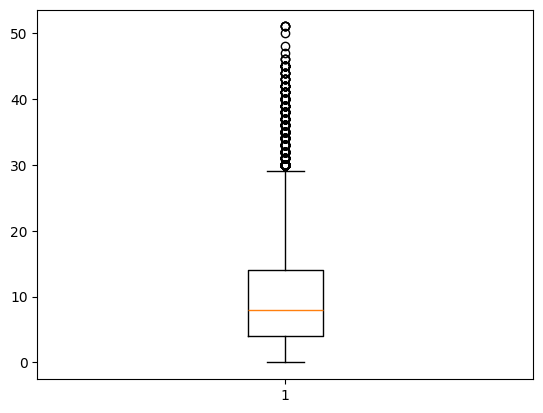

In [278]:
#now finding the outliers

import matplotlib.pyplot as plt

plt.boxplot(data['YearsCodePro'])

In [279]:
#removing outliers i.e. experience more than 30 years

data = data[data['YearsCodePro'] < 30]

In [280]:
data.head()

,DevType,Country,YearsCodePro,EdLevel,RemoteWork,OrgSize,ConvertedCompYearly,JobSat
72,0,0,1.0,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)",100 to 499 employees,7322.0,10.0
379,0,1,6.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,20 to 99 employees,91295.0,10.0
389,1,2,7.0,Some college/university study without earning ...,Remote,10 to 19 employees,110000.0,10.0
392,2,3,18.0,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Hybrid (some remote, some in-person)","1,000 to 4,999 employees",161044.0,7.0
415,3,4,16.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,20 to 99 employees,79481.0,3.0


In [321]:
import pickle

with open('yearscodepro_data.pkl', 'wb') as f:
    pickle.dump(data['YearsCodePro'], f)

### EdLevel

In [281]:
data['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          7021
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       4463
Some college/university study without earning a degree                                1791
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     773
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         677
Associate degree (A.A., A.S., etc.)                                                    497
Something else                                                                         135
Primary/elementary school                                                               82
Name: count, dtype: int64

In [282]:
data = data[data['EdLevel'] != 'Primary/elementary school']
data = data[data['EdLevel'] != 'Something else']

In [283]:
#assigning numerical value based on degree heirarchy

education = {
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1,
    'Some college/university study without earning a degree': 2,
    'Associate degree (A.A., A.S., etc.)': 3,
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 4,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 5,
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 6
}

data['EdLevel'] = data['EdLevel'].map(education)

In [284]:
with open('edlevel_map.pkl', 'wb') as f:
    pickle.dump(education, f)

### RemoteWork

In [285]:
data['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    6546
Remote                                  6132
In-person                               2544
Name: count, dtype: int64

In [286]:
#using similar method to encode based on order of flexibility

remote = {
    'Remote': 0,
    'Hybrid (some remote, some in-person)': 1,
    'In-person': 2
}

data['RemoteWork'] = data['RemoteWork'].map(remote)

In [287]:
with open('remotework_map.pkl', 'wb') as f:
    pickle.dump(remote, f)

### OrgSize

In [288]:
data['OrgSize'].value_counts()

OrgSize
20 to 99 employees                                    3457
100 to 499 employees                                  3170
1,000 to 4,999 employees                              1888
10,000 or more employees                              1887
10 to 19 employees                                    1414
2 to 9 employees                                      1411
500 to 999 employees                                  1095
5,000 to 9,999 employees                               665
I don’t know                                           163
Just me - I am a freelancer, sole proprietor, etc.      72
Name: count, dtype: int64

In [289]:
#removing unneccesary noise i.e. too low value_counts

data = data[data['OrgSize'] != 'I dont know']
data = data[data['OrgSize'] != 'Just me - I am a freelancer, sole proprietor, etc.']

In [290]:
#encoding based on size of organisation

org_map = {
    '2 to 9 employees': 0,
    '10 to 19 employees': 1,
    '20 to 99 employees': 2,
    '100 to 499 employees': 3,
    '500 to 999 employees': 4,
    '1,000 to 4,999 employees': 5,
    '5,000 to 9,999 employees': 6,
    '10,000 or more employees': 7
}

data['OrgSize'] = data['OrgSize'].map(org_map)

In [291]:
with open('orgsize_map.pkl', 'wb') as f:
    pickle.dump(org_map, f)

In [292]:
#checking again for null values since we removed categories earlier

data.isna().sum()

DevType                  0
Country                  0
YearsCodePro             0
EdLevel                  0
RemoteWork               0
OrgSize                163
ConvertedCompYearly      0
JobSat                   0
dtype: int64

In [293]:
#Removing null values created due to removing two categories

data = data.dropna(subset=['OrgSize'])

In [294]:
#Converting to int for uniformity

data['OrgSize'] = data['OrgSize'].astype(int)

### JobSat

In [295]:
data['JobSat'].value_counts()

JobSat
8.0     3868
7.0     3281
6.0     1955
9.0     1885
10.0    1069
5.0      940
4.0      635
3.0      622
2.0      428
0.0      160
1.0      144
Name: count, dtype: int64

In [296]:
#JobSat does not require any cleaning

In [297]:
data.head()

,DevType,Country,YearsCodePro,EdLevel,RemoteWork,OrgSize,ConvertedCompYearly,JobSat
72,0,0,1.0,1,1,3,7322.0,10.0
379,0,1,6.0,5,0,2,91295.0,10.0
389,1,2,7.0,2,0,1,110000.0,10.0
392,2,3,18.0,6,1,5,161044.0,7.0
415,3,4,16.0,5,0,2,79481.0,3.0


In [320]:
import pickle

with open('convertedcompyearly_data.pkl', 'wb') as f:
    pickle.dump(data['ConvertedCompYearly'], f)

## 3. Salary Prediction

### A. Regression Models

**Input and Output Data**

In [298]:
#Splitting into input and output for Salary Model

X = data.drop(['ConvertedCompYearly', 'JobSat'], axis=1)
y_salary = data['ConvertedCompYearly']

**Training and Testing Data**

In [299]:
#Splitting into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_salary, test_size=0.2, random_state=42)

**Regression Pipeline**

In [300]:
#Importing all models and libraries for pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

In [301]:
#Pipeline for Regression Models

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MAE': round(mae, 2)
    })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

               Model  R2 Score       MAE
0  Linear Regression    0.0448  50098.69
2  Gradient Boosting    0.0319  41321.30
1      Random Forest    0.0275  42666.43
3            XGBoost   -0.0323  42037.42
4           CatBoost   -0.2439  41407.78


### B. MidPoint Regression Models

**Creating MidPoint**

Due to extremely poor results, we will use MidPoint Regression to create Salary Ranges represented by their midpoint value i.e. 

*<20k, 20-40k, 40-60k, 60-80k, 80-100k, 100-120k, 120-150k, 150k*

In [302]:
def get_salary_midpoint(value):
    if value < 20000:
        return 10000
    elif value < 40000:
        return 30000
    elif value < 60000:
        return 50000
    elif value < 80000:
        return 70000
    elif value < 100000:
        return 90000
    elif value < 120000:
        return 110000
    elif value < 150000:
        return 135000
    else:
        return 160000

data['SalaryMidpoint'] = data['ConvertedCompYearly'].apply(get_salary_midpoint)

**Input and Output Data**

In [303]:
#Again creating input and output variables for MidPoint Regression

X = data.drop(columns=['ConvertedCompYearly', 'SalaryMidpoint', 'JobSat'])
y = data['SalaryMidpoint']

**Training and Testing Data**

In [304]:
#Splitting into training and testing again

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Regression Pipeline**

In [305]:
#Recreating pipeline for MidPoint Regression

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

results = []

#Training each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    results.append((name, r2, mae))

#Adding evaluation to dataframe for comparison
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE"])
print(results_df.sort_values("R2 Score", ascending=False))

               Model  R2 Score           MAE
4           CatBoost  0.639160  21602.882390
2  Gradient Boosting  0.615562  22905.329256
3            XGBoost  0.609255  22409.676859
1      Random Forest  0.577935  23304.550889
0  Linear Regression  0.272871  34120.969824


**Saving CatBoost Regressor Model**

The best results have been achieved using CatBoost Regressor thus we will re-train this model separately and save it for external use 

In [306]:
#The best model seems to be CatBoost regressor
#Thus we will train separately and create .pkl file for application
import joblib

best_model = CatBoostRegressor(verbose=0)
best_model.fit(X_train, y_train)

joblib.dump(best_model, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']

**Backup of Data**

The training and testing data is being stored as backups to avoid potential conflicts with the Job Satisfaction Prediction Models

In [307]:
#Saving salary training and testing as copies

X_train_salary = X_train.copy()
X_test_salary = X_test.copy()
y_train_salary = y_train.copy()
y_test_salary = y_test.copy()

**Actual vs Predicted Salary**

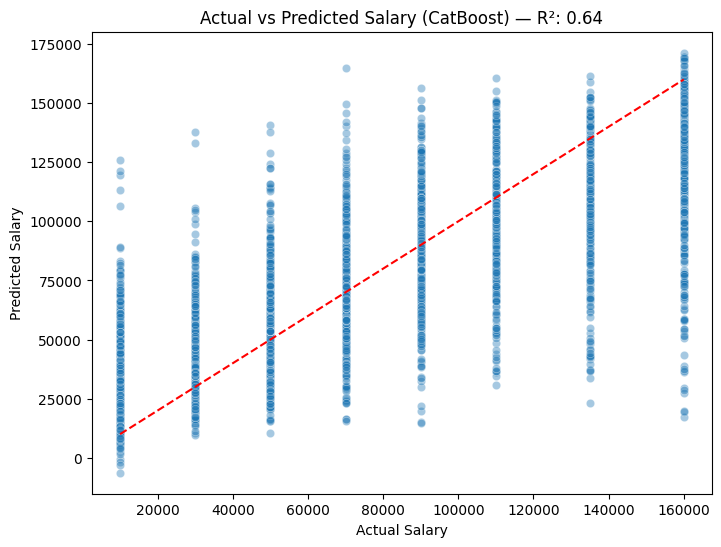

In [308]:
from sklearn.metrics import r2_score
import seaborn as sns

y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title(f"Actual vs Predicted Salary (CatBoost) — R²: {r2_score(y_test, y_pred):.2f}")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

## 4. Satisfaction Prediction

**Input and Output Data**

In [309]:
#Creating input variable for Satisfaction Model
X = data.drop(['ConvertedCompYearly', 'SalaryMidpoint', 'JobSat'], axis=1)

In [310]:
#Ensure no salary or satisfaction data is leaking
X.columns

Index(['DevType', 'Country', 'YearsCodePro', 'EdLevel', 'RemoteWork',
       'OrgSize'],
      dtype='object')

In [311]:
y_satisfaction = data['JobSat']

In [312]:
y_satisfaction

72       10.0
379      10.0
389      10.0
392       7.0
415       3.0
         ... 
41173     9.0
41174     6.0
41175     6.0
41178     0.0
41186     3.0
Name: JobSat, Length: 14987, dtype: float64

**Note**

Job satisfaction ratings taken from surveys tend to be within the range of average and above average since it is rare for employees to be extremely dissatisfied.
Thus to pevent imbalances and skewed learning, JobSat is being categorised into three categories: Dissatisfied, Neutral, Satisfied

Then it is being encoded so that it will be compatible with the machine learning models

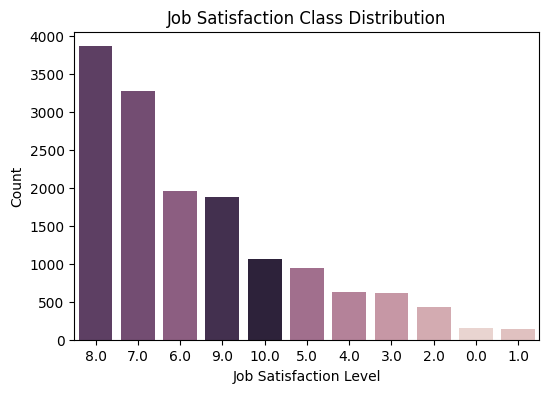

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='JobSat', data=data, order=data['JobSat'].value_counts().index, hue='JobSat', legend=False)
plt.title('Job Satisfaction Class Distribution')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.show()

In [314]:
#JobSat is broken down into ranges

def simplify_satisfaction(score):
    if score <= 4:
        return 'Dissatisfied'
    elif score == 5:
        return 'Neutral'
    else:
        return 'Satisfied'

data['JobSatSimplified'] = data['JobSat'].apply(simplify_satisfaction)

In [315]:
#However we need numerical data so encoding JobSatSimplified

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['JobSatEncoded'] = le.fit_transform(data['JobSatSimplified'])

In [316]:
import pickle

with open('satisfaction_labels.pkl', 'wb') as f:
    pickle.dump(le, f)

In [317]:
#finally we have

y_satisfaction = data['JobSatEncoded']

**Training and Testing Data**

In [318]:
#Splitting into training and testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y_satisfaction, test_size=0.2, random_state=42, stratify=y_satisfaction
)

**Classification Pipeline**

In [253]:
#Importing all the necessary libraries for Classification Models and Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [257]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "CatBoost": CatBoostClassifier(verbose=0)
}

results = []

for name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results.append((name, acc))

#Adding evaluation results to Dataframe from comparison
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:56:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy
0  Logistic Regression  0.804536
2    Gradient Boosting  0.803869
4             CatBoost  0.800200
3              XGBoost  0.794863
1        Random Forest  0.756838


**Saving Logistic Regression Model**

In [258]:
#Logistic Regression has the highest accuracy thus we will save this model

from sklearn.linear_model import LogisticRegression
import joblib

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

joblib.dump(model, 'satisfaction_model.pkl')


['satisfaction_model.pkl']